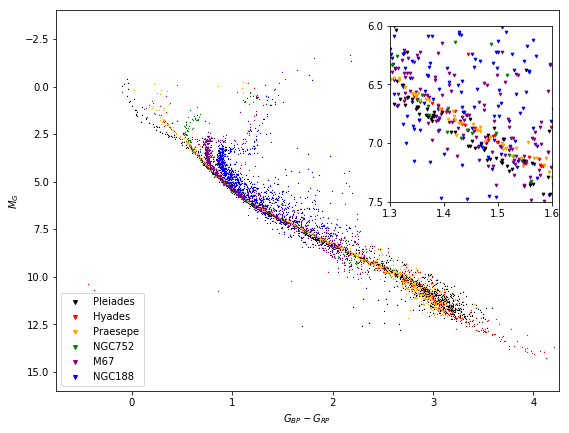

In [2]:
import pandas as panda
import matplotlib.pyplot as plt
import matplotlib as mp
import numpy as np
from IPython.display import set_matplotlib_formats

def main():
    # Loading each CSV into a dataframe to read from
    Hyades = panda.read_csv("../Hyades/Hyadesx2xPxG.csv")
    Praesepe = panda.read_csv("../Praesepe/Praesepex2xPxG.csv")
    Pleiades = panda.read_csv("../Pleiades/Pleiadesx2xPxG.csv")
    M67 = panda.read_csv("../M67/M67x2xPxG.csv")
    NGC752 = panda.read_csv("../NGC752/NGC752x2xPxG.csv")
    NGC188 = panda.read_csv("../NGC188/NGC188x2xPxG.csv")


    #Removing points with error in phot_g_mean_flux_over_error > 50, phot_rp_mean_flux_over_error>20, phot_bp_mean_flux_over_error>20
    Hyades = Hyades[(Hyades.phot_g_mean_flux_over_error >= 50) & (Hyades.phot_rp_mean_flux_over_error >= 20) & (Hyades.phot_bp_mean_flux_over_error >= 20) & (Hyades.parallax > 0)]
    NGC188 = NGC188[(NGC188.phot_g_mean_flux_over_error >= 50) & (NGC188.phot_rp_mean_flux_over_error >= 20) & (NGC188.phot_bp_mean_flux_over_error >= 20)& (NGC188.parallax > 0)]
    NGC752 = NGC752[(NGC752.phot_g_mean_flux_over_error >= 50) & (NGC752.phot_rp_mean_flux_over_error >= 20) & (NGC752.phot_bp_mean_flux_over_error >= 20) & (NGC752.parallax > 0)]
    M67 = M67[(M67.phot_g_mean_flux_over_error >= 50) & (M67.phot_rp_mean_flux_over_error >= 20) & (M67.phot_bp_mean_flux_over_error>= 20) & (M67.parallax > 0)]
    Pleiades = Pleiades[(Pleiades.phot_g_mean_flux_over_error >= 50) & (Pleiades.phot_rp_mean_flux_over_error >= 20) & (Pleiades.phot_bp_mean_flux_over_error >= 20) & (Pleiades.parallax > 0)]
    Praesepe = Praesepe[(Praesepe.phot_g_mean_flux_over_error >= 50) & (Praesepe.phot_rp_mean_flux_over_error >= 20) & (Praesepe.phot_bp_mean_flux_over_error >= 20) & (Praesepe.parallax > 0)]

    # Calculating distance modifier
    HyadesDistMod = distMod(Hyades['parallax'])
    NGC752DistMod = distMod(NGC752['parallax'])
    NGC188DistMod = distMod(NGC188['parallax'])
    M67DistMod = distMod(M67['parallax'])
    PleiadesDistMod = distMod(Pleiades['parallax'])
    PraesepeDistMod = distMod(Praesepe['parallax'])

    fig, ax1 = plt.subplots(figsize=(9,7))
    
    
    # Plotting
    plt.plot(Pleiades["bp_rp"], Pleiades["phot_g_mean_mag"]-PleiadesDistMod, marker = "v", markersize = 0.5, color = "black", linestyle = "none", label = "Pleiades")
    plt.plot(Hyades["bp_rp"], Hyades["phot_g_mean_mag"]-HyadesDistMod, marker = "v", markersize = 0.5, color = "red", linestyle = "none", label = "Hyades")
    plt.plot(Praesepe["bp_rp"], Praesepe["phot_g_mean_mag"]-PraesepeDistMod, marker = "v", markersize = 0.5, color = "orange", linestyle = "none", label = "Praesepe")
    plt.plot(NGC752["bp_rp"], NGC752["phot_g_mean_mag"]-NGC752DistMod, marker = "v", markersize = 0.5, color = "green", linestyle = "none", label = "NGC752")
    plt.plot(M67["bp_rp"], M67["phot_g_mean_mag"]-M67DistMod, marker = "v", markersize = 0.5, color = "purple", linestyle = "none", label = "M67")
    plt.plot(NGC188["bp_rp"], NGC188["phot_g_mean_mag"]-NGC188DistMod, marker = "v", markersize = 0.5, color = "blue", linestyle = "none", label = "NGC188")
            
    plt.ylabel("$M_G$")
    plt.xlabel("$G_{BP} - G_{RP}$")
    plt.legend(loc = "lower left", markerscale = 8)
    plt.xlim(-0.75, 4.25)
    plt.xticks([0, 1, 2, 3, 4])
    plt.ylim(16, -4)

  # Defining the inset plot
    ax2 = fig.add_axes([0.64, 0.5, 0.25, 0.35])
    ax2.tick_params(labelsize = 10)
    ax2.scatter(Hyades["bp_rp"], Hyades["phot_g_mean_mag"] - HyadesDistMod, marker = "v", s = 7, color = "red")
    ax2.scatter(NGC188["bp_rp"], NGC188["phot_g_mean_mag"] - NGC188DistMod, marker = "v", s = 7, color = "blue")
    ax2.scatter(M67["bp_rp"], M67["phot_g_mean_mag"] - M67DistMod, marker = "v", s = 7, color = "purple")
    ax2.scatter(NGC752["bp_rp"], NGC752["phot_g_mean_mag"] - NGC752DistMod, marker = "v", s = 7, color = "green")
    ax2.scatter(Pleiades["bp_rp"], Pleiades["phot_g_mean_mag"] - PleiadesDistMod, marker = "v", s = 7, color = "black")
    ax2.scatter(Praesepe["bp_rp"], Praesepe["phot_g_mean_mag"] - PraesepeDistMod, marker = "v", s = 7, color = "orange")
    ax2.set_xlim(1.3,1.6)
    ax2.set_ylim(7.5, 6)
    ax2.set_yticks([7.5, 7, 6.5, 6])
    
    # Using Davenports image quality code:
    set_matplotlib_formats('pdf', 'png')
    plt.rcParams['savefig.dpi'] = 200

    plt.rcParams['figure.autolayout'] = False
    plt.rcParams['figure.figsize'] = 8,6
    plt.rcParams['axes.labelsize'] = 18
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['font.size'] = 16
    plt.rcParams['lines.linewidth'] = 2.0
    plt.rcParams['lines.markersize'] = 8
    plt.rcParams['legend.fontsize'] = 14

    mp.rcParams['xtick.direction'] = 'out'
    mp.rcParams['ytick.direction'] = 'out'



    
    plt.show()

def distMod(parallax):
    result = 5*(np.log10(1000/parallax)-1)
    return result

main()